# Supermarket user segmentation
Every row of the dataset represents one customer who has registered to use the service during September 2019, orders from then to October 2020.
"User segmentation that helps the supermarket understand what type of users we have. While doing this, familiarize myself with the dataset."
Justify segmentation approach.

In [2]:
#import libraries and csv
import pandas as pd
import numpy as np
import ast

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

df = pd.read_csv('dataset_for_analyst_assignment_20201120.csv', sep= ',', index_col=False)
df

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21978,2019-09-30 00:00:00.000,GRC,1,1.0,0.0,2020-01-23 00:00:00.000,2020-01-23 00:00:00.000,21979,0.0,0.0,...,0.0,1.0,NaN,False,12.0,2.0,NaN,NaN,1.383,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21979,2019-09-30 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,21980,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21980,2019-09-30 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,21981,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21981,2019-09-30 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,21982,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [3]:
# general info 4.9MB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

In [4]:
#checking types as it may take too much memory. LATE_NIGHT_PURCHASES is empty
df.describe()

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,...,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
count,21983.000000,12028.000000,12028.000000,21983.00000,12028.000000,12028.000000,12028.000000,12028.000000,12028.0,12028.000000,...,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,7832.000000,7832.000000,12028.000000
mean,3.345358,5.741686,0.372464,10992.00000,0.193964,2.375042,0.493432,3.029016,0.0,176.210419,...,42.068043,31.195060,2.900482,1.056535,2.157133,11.501995,4.010392,64.293539,55.792135,5.961218
std,8.523171,10.536220,1.416310,6346.08982,1.104067,5.626178,1.827710,5.238209,0.0,299.086986,...,41.176221,20.716542,7.456288,4.776431,6.876314,6.930837,2.010071,72.570103,74.963336,3.466263
min,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.012000,...,1.016000,1.012000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002000
25%,0.000000,1.000000,0.000000,5496.50000,0.000000,0.000000,0.000000,0.000000,0.0,32.384000,...,23.368000,19.228000,0.000000,0.000000,0.000000,5.000000,2.000000,18.000000,10.000000,2.950500
50%,1.000000,2.000000,0.000000,10992.00000,0.000000,1.000000,0.000000,1.000000,0.0,75.900000,...,35.560000,27.324000,0.000000,0.000000,0.000000,11.500000,4.000000,39.500000,25.000000,5.928000
75%,3.000000,6.000000,0.000000,16487.50000,0.000000,2.000000,0.000000,3.000000,0.0,196.328000,...,51.816000,38.456000,2.000000,1.000000,1.000000,18.000000,6.000000,81.000000,68.250000,8.978000
max,320.000000,320.000000,44.000000,21983.00000,52.000000,171.000000,71.000000,104.000000,0.0,7979.620000,...,3048.000000,657.800000,200.000000,196.000000,221.000000,23.000000,7.000000,421.000000,421.000000,11.999000


In [5]:
#changing types, as there is not need of much memory. Memory 3MB
# Convert int64 columns to int16
df[['PURCHASE_COUNT', 'USER_ID']] = df[['PURCHASE_COUNT', 'USER_ID']].astype(np.int16)

# Convert float64 columns to float32
float64_cols = list(df.select_dtypes(include=['float64']).columns)
df[float64_cols] = df[float64_cols].astype(np.float32)
#df.info()

#drop LATE_NIGHT_PURCHASES
df = df.drop('LATE_NIGHT_PURCHASES', axis=1)
df

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21978,2019-09-30 00:00:00.000,GRC,1,1.0,0.0,2020-01-23 00:00:00.000,2020-01-23 00:00:00.000,21979,0.0,0.0,...,0.0,1.0,NaN,False,12.0,2.0,NaN,NaN,1.383,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21979,2019-09-30 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,21980,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21980,2019-09-30 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,21981,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21981,2019-09-30 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,21982,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


It seems like valuable information is around 12028 users, even though 21983 people registered, only 12028 bought at least once (54%)
We can do the segmentation as frequent purchasers(3), infrequent purchasers(2), first-time purchasers(1), and non-purchasers (0).
It will be reflected in a column called BUYER.

A look around the general data..

In [6]:
# Split PURCHASE_COUNT_BY_STORE_TYPE column
df[['General merchandise', 'Grocery', 'Pet supplies', 'Restaurant', 'Retail store']] = df['PURCHASE_COUNT_BY_STORE_TYPE'].apply(lambda x: pd.Series(ast.literal_eval(x)))
df = df.drop(['PURCHASE_COUNT_BY_STORE_TYPE'], axis=1)

#changing type as default is int64
df[['General merchandise', 'Grocery', 'Pet supplies', 'Restaurant', 'Retail store']] = df[['General merchandise', 'Grocery', 'Pet supplies', 'Restaurant', 'Retail store']].astype(np.int16)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int16  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float32
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float32
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int16  
 8   BREAKFAST_PURCHASES                      12028 non-null  float32
 9   LUNCH_PURCHASES                          12028 non-null  float32
 10  EVENING_PURCHASES                        12028

Countries that have most used the web or mobile app: DNK, FIN, GRC
Preferred device: ios and android

In [7]:
# Country and type of devices where customers did bought!
# Most of the purchases are restaurant, retail store and grocery type, so users might be older than 30, not many pet supplies purchases

df.groupby('REGISTRATION_COUNTRY')[['IOS_PURCHASES','ANDROID_PURCHASES','WEB_PURCHASES', 'General merchandise', 'Grocery', 'Pet supplies', 'Restaurant', 'Retail store']].sum().sort_values(by = 'IOS_PURCHASES', ascending=False)

,IOS_PURCHASES,ANDROID_PURCHASES,WEB_PURCHASES,General merchandise,Grocery,Pet supplies,Restaurant,Retail store
REGISTRATION_COUNTRY,,,,,,,,
DNK,16699.0,4977.0,6546.0,589,4683,61,17531,5358
FIN,13296.0,16877.0,4461.0,687,6184,84,20784,6895
GRC,4706.0,3989.0,1685.0,160,1782,28,6182,2228
EST,35.0,47.0,3.0,3,13,0,49,20
LVA,33.0,8.0,0.0,0,16,1,21,3
CZE,33.0,11.0,2.0,0,17,1,25,3
NOR,18.0,7.0,4.0,1,3,0,25,0
GBR,17.0,0.0,0.0,1,6,0,10,0
ISR,10.0,6.0,0.0,1,3,0,9,3


# SEGMENTATION
## Non-purchasers (45 %)

In [8]:
# Total of users: 21983
# 9955*100/21983

In [9]:
# Check first, between buyers and not buyers, in the column 'BUYER' a number of the segmentation is going to be display
df['BUYER'] = np.where(df['PURCHASE_COUNT'] == 0, 0, 1).astype('int8')
df[df['BUYER'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 21981
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        9955 non-null   object 
 1   REGISTRATION_COUNTRY                     9955 non-null   object 
 2   PURCHASE_COUNT                           9955 non-null   int16  
 3   PURCHASE_COUNT_DELIVERY                  0 non-null      float32
 4   PURCHASE_COUNT_TAKEAWAY                  0 non-null      float32
 5   FIRST_PURCHASE_DAY                       0 non-null      object 
 6   LAST_PURCHASE_DAY                        0 non-null      object 
 7   USER_ID                                  9955 non-null   int16  
 8   BREAKFAST_PURCHASES                      0 non-null      float32
 9   LUNCH_PURCHASES                          0 non-null      float32
 10  EVENING_PURCHASES                        0 non-

Number of non_buyers with valid payment method. None of those have chosen any option for PURCHASE_COUNT_BY_STORE_TYPE

Find insights into why these users have not made a purchase

In [10]:
#Only 16 of those have chosen PREFERRED_RESTAURANT_TYPES, most of them have chosen american and italian. it might be more types needed?!
#df[df['BUYER'] == 0].groupby(['REGISTRATION_COUNTRY', 'PREFERRED_DEVICE', 'PREFERRED_RESTAURANT_TYPES'])['USER_HAS_VALID_PAYMENT_METHOD'].sum().sort_values(ascending=False)
#Maybe this users with valid card, need a little push, in order to buy?
#Not much information about non buyers

df[df['BUYER'] == 0].groupby(['REGISTRATION_COUNTRY', 'PREFERRED_DEVICE'])['USER_HAS_VALID_PAYMENT_METHOD'].sum().sort_values(ascending=False)

REGISTRATION_COUNTRY  PREFERRED_DEVICE
FIN                   ios                 150
                      android              92
DNK                   ios                  57
                      web                  49
FIN                   web                  34
                                         ... 
FRA                   ios                   0
                      android               0
EST                   web                   0
                      android               0
USA                   web                   0
Name: USER_HAS_VALID_PAYMENT_METHOD, Length: 106, dtype: int64

# First-time purchasers (19%)
Only one purchase after registration

In [11]:
# Total of users: 21983
#4179*100/21983

# 2115 the first day they registered, they bought something (9.61% of total)
df[df['PURCHASE_COUNT']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4179 entries, 1 to 21982
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        4179 non-null   object 
 1   REGISTRATION_COUNTRY                     4179 non-null   object 
 2   PURCHASE_COUNT                           4179 non-null   int16  
 3   PURCHASE_COUNT_DELIVERY                  4179 non-null   float32
 4   PURCHASE_COUNT_TAKEAWAY                  4179 non-null   float32
 5   FIRST_PURCHASE_DAY                       4150 non-null   object 
 6   LAST_PURCHASE_DAY                        4178 non-null   object 
 7   USER_ID                                  4179 non-null   int16  
 8   BREAKFAST_PURCHASES                      4179 non-null   float32
 9   LUNCH_PURCHASES                          4179 non-null   float32
 10  EVENING_PURCHASES                        4179 n

In [12]:
# Count the information of the columns that can be counted as cannot sum median, average columns, etc
float32_cols = list(df.select_dtypes(include=['float32', 'int16']).columns)
non_required = ['USER_ID', 'AVG_PURCHASE_VALUE_EUR', 'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE', 'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES','MAX_PURCHASE_VALUE_EUR', 'LATE_NIGHT_PURCHASES','MEDIAN_DAYS_BETWEEN_PURCHASES', 'AVERAGE_DELIVERY_DISTANCE_KMS', 'MIN_PURCHASE_VALUE_EUR']
columns_needed = [x for x in float32_cols if x not in non_required]

In [13]:
#df[(df['REGISTRATION_DATE'] == df['LAST_PURCHASE_DAY']) & (df['PURCHASE_COUNT']==1)].info()
#df[df['PURCHASE_COUNT']==1].info()

In [14]:
# most of the purchases are bought in the same day that registered, probably due to a discount. Only 2151
# MOST of them buy in dinner and lunch time, delivery most chosen, around 50% customers has registered the payment_method, and only have purchased restaurant kind.

df[(df['PURCHASE_COUNT']==1)].groupby(['REGISTRATION_COUNTRY'])[columns_needed].sum().sort_values(by = 'PURCHASE_COUNT', ascending = False)

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,General merchandise,Grocery,Pet supplies,Restaurant,Retail store
REGISTRATION_COUNTRY,,,,,,,,,,,,,,,,,
FIN,1869,1762.0,107.0,73.0,807.0,164.0,804.0,54245.222656,1869.0,722.0,340.0,807.0,0,0,0,1869,0
DNK,1720,1544.0,176.0,19.0,473.0,61.0,1165.0,70616.351562,1720.0,899.0,536.0,285.0,0,0,0,1720,0
GRC,574,551.0,23.0,29.0,218.0,152.0,173.0,8098.023926,574.0,169.0,116.0,289.0,0,0,0,574,0
NOR,7,6.0,1.0,1.0,2.0,1.0,3.0,351.164001,7.0,4.0,2.0,1.0,0,0,0,7,0
EST,3,3.0,0.0,0.0,0.0,2.0,1.0,75.900002,3.0,0.0,3.0,0.0,0,0,0,3,0
POL,2,2.0,0.0,0.0,0.0,1.0,1.0,58.695999,2.0,0.0,1.0,1.0,0,0,0,2,0
SWE,2,2.0,0.0,0.0,0.0,0.0,2.0,48.576000,2.0,1.0,0.0,1.0,0,0,0,2,0
CZE,1,1.0,0.0,0.0,1.0,0.0,0.0,24.288000,1.0,0.0,0.0,1.0,0,0,0,1,0
FRA,1,1.0,0.0,0.0,0.0,1.0,0.0,30.360001,1.0,1.0,0.0,0.0,0,0,0,1,0


In [15]:
df[(df['PURCHASE_COUNT']==1)].groupby('REGISTRATION_COUNTRY')[['General merchandise', 'Grocery', 'Pet supplies', 'Restaurant', 'Retail store']].sum().sort_values(by = 'Restaurant', ascending= False)

,General merchandise,Grocery,Pet supplies,Restaurant,Retail store
REGISTRATION_COUNTRY,,,,,
FIN,0,0,0,1869,0
DNK,0,0,0,1720,0
GRC,0,0,0,574,0
NOR,0,0,0,7,0
EST,0,0,0,3,0
POL,0,0,0,2,0
SWE,0,0,0,2,0
CZE,0,0,0,1,0
FRA,0,0,0,1,0


# Other purchasers (35.7%)
the segmentation of customers who have bought more than once, It is going to be divided by Kmeans, as there are many information

In [16]:
#7849*100/21983  35.7%

In [17]:
# drop some columns that might not be necessary or might cause problems with segmentation
# Some features or columns might be risky to take as for instance there are 3 countries with much purchase_count, it might split by country.
# Taking care of nans
purchasers = df[df['PURCHASE_COUNT'] > 1]
purchasers = purchasers.drop(['REGISTRATION_DATE', 'REGISTRATION_COUNTRY','FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY', 'PREFERRED_DEVICE', 'PREFERRED_RESTAURANT_TYPES', 'BUYER'], axis=1)
purchasers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7849 entries, 2 to 21975
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   PURCHASE_COUNT                           7849 non-null   int16  
 1   PURCHASE_COUNT_DELIVERY                  7849 non-null   float32
 2   PURCHASE_COUNT_TAKEAWAY                  7849 non-null   float32
 3   USER_ID                                  7849 non-null   int16  
 4   BREAKFAST_PURCHASES                      7849 non-null   float32
 5   LUNCH_PURCHASES                          7849 non-null   float32
 6   EVENING_PURCHASES                        7849 non-null   float32
 7   DINNER_PURCHASES                         7849 non-null   float32
 8   TOTAL_PURCHASES_EUR                      7849 non-null   float32
 9   DISTINCT_PURCHASE_VENUE_COUNT            7849 non-null   float32
 10  MIN_PURCHASE_VALUE_EUR                   7849 n

In [19]:
#only to see the correlation
purchasers1 = purchasers.copy()
purchasers1 = purchasers1.drop(['USER_ID', 'USER_HAS_VALID_PAYMENT_METHOD'], axis=1)
purchasers1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7849 entries, 2 to 21975
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   PURCHASE_COUNT                           7849 non-null   int16  
 1   PURCHASE_COUNT_DELIVERY                  7849 non-null   float32
 2   PURCHASE_COUNT_TAKEAWAY                  7849 non-null   float32
 3   BREAKFAST_PURCHASES                      7849 non-null   float32
 4   LUNCH_PURCHASES                          7849 non-null   float32
 5   EVENING_PURCHASES                        7849 non-null   float32
 6   DINNER_PURCHASES                         7849 non-null   float32
 7   TOTAL_PURCHASES_EUR                      7849 non-null   float32
 8   DISTINCT_PURCHASE_VENUE_COUNT            7849 non-null   float32
 9   MIN_PURCHASE_VALUE_EUR                   7849 non-null   float32
 10  MAX_PURCHASE_VALUE_EUR                   7849 n

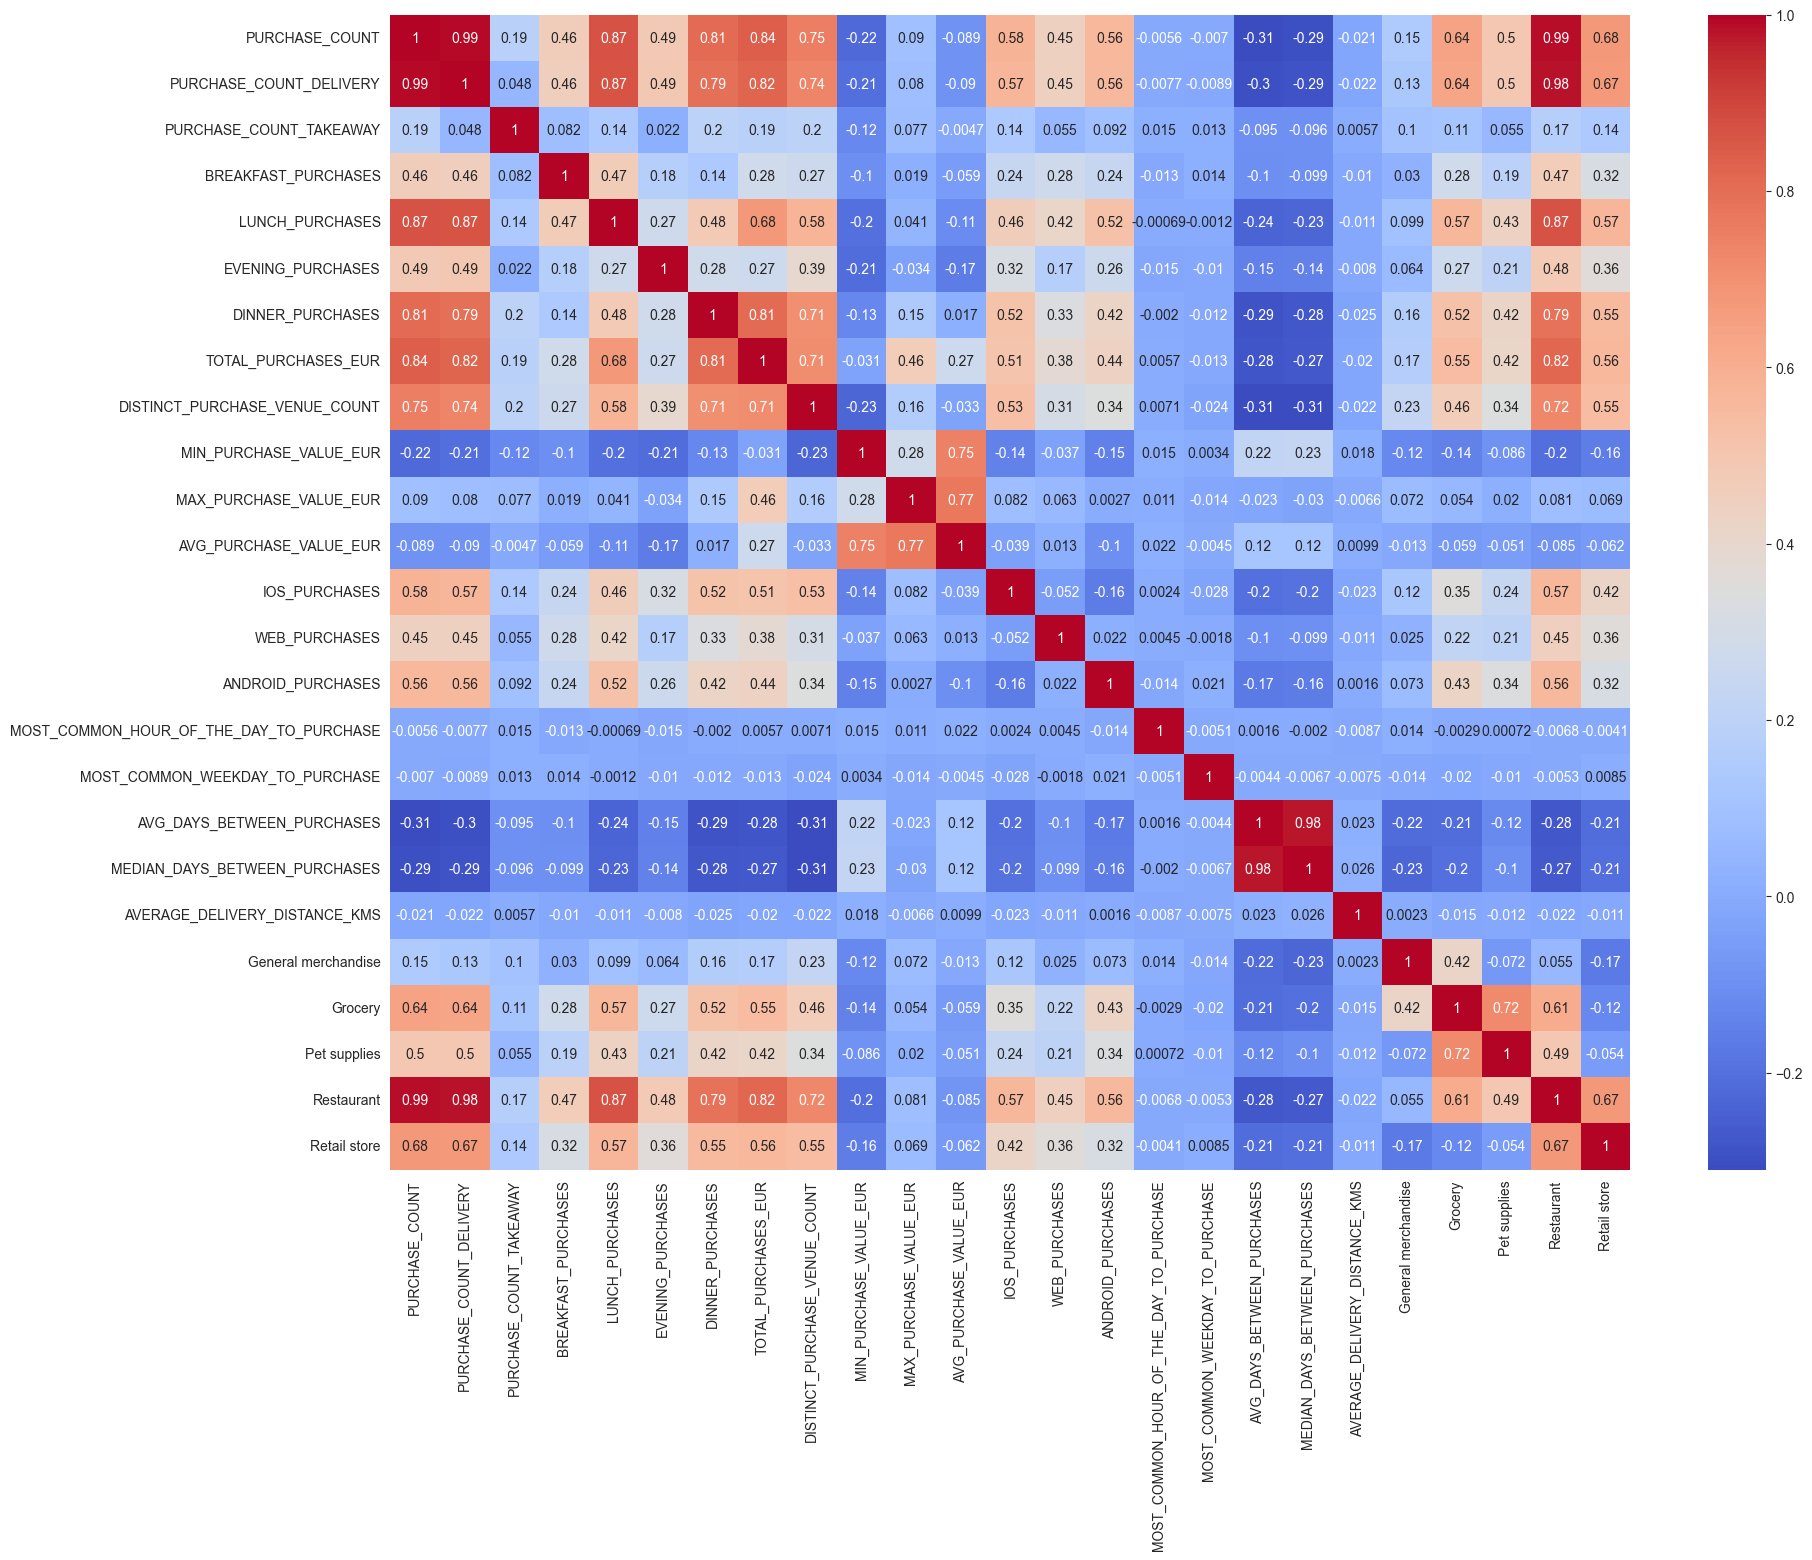

In [20]:
# Calculate the correlation among features
corr_matrix = purchasers1.corr()

# Visualize the correlation matrix with colors
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [21]:
#there were nans in avg_days y median_days
purchasers = purchasers.fillna(value=0)

In [22]:
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters=k).fit(purchasers) for k in range(2,10)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[82029654331.99884,
 36750331043.401825,
 21040800065.073277,
 13572148091.269238,
 9722051512.39812,
 7484950431.322798,
 6026372020.217626,
 4921042729.742292]

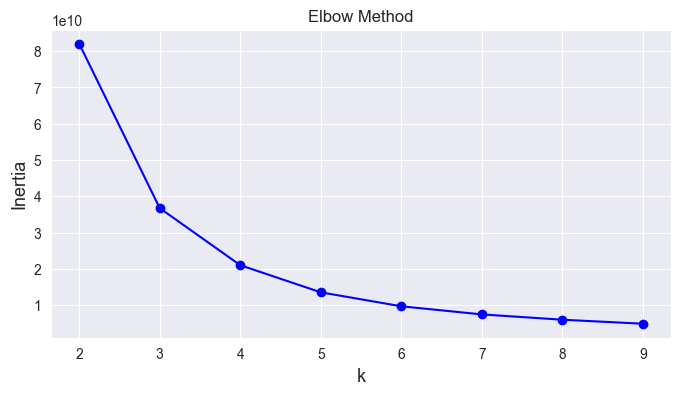

In [23]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), inertias, "bo-")
plt.title('Elbow Method')
plt.xlabel("k", fontsize=13)
plt.ylabel("Inertia", fontsize=13)
plt.show()

In [24]:
# Standardize the features to have zero mean and unit variance to not have problems forward
X = StandardScaler().fit_transform(purchasers)

# Apply k-means clustering with 4 clusters as the elbow method says
kmeans = KMeans(n_clusters=5)
kmeans.fit(purchasers)

# Add the cluster labels to df, initial number to 2 as this df is going to join the df with column buyer (0 and 1).
purchasers['cluster'] = kmeans.labels_ +2

# Number of samples in each cluster
purchasers['cluster'].value_counts()

3    1672
6    1641
5    1569
4    1505
2    1462
Name: cluster, dtype: int64

In [25]:
# Join the 'cluster' column from purchasers to df by the 'USER_ID' column
df_merged = pd.merge(df, purchasers[['USER_ID', 'cluster']], on='USER_ID', how='left')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21983 entries, 0 to 21982
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int16  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float32
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float32
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int16  
 8   BREAKFAST_PURCHASES                      12028 non-null  float32
 9   LUNCH_PURCHASES                          12028 non-null  float32
 10  EVENING_PURCHASES                        12028

In [26]:
df_merged['cluster'] = df_merged['cluster'].fillna(df['BUYER'])
df_merged['cluster'] = df_merged['cluster'].astype('int8')
df_merged = df_merged.drop(['BUYER'], axis=1)

In [27]:
df_merged.sort_values(by=['cluster', 'TOTAL_PURCHASES_EUR'], ascending=False)

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,General merchandise,Grocery,Pet supplies,Restaurant,Retail store,cluster
9517,2019-09-14 00:00:00.000,DNK,106,104.0,2.0,2019-09-19 00:00:00.000,2020-10-27 00:00:00.000,9518,1.0,57.0,...,4.0,4.0,1.0,7.741,0,0,0,53,53,6
10998,2019-09-15 00:00:00.000,DNK,55,55.0,0.0,2019-10-01 00:00:00.000,2020-07-03 00:00:00.000,10999,0.0,24.0,...,4.0,5.0,4.0,4.210,0,27,1,27,0,6
9261,2019-09-14 00:00:00.000,DNK,74,74.0,0.0,2019-09-14 00:00:00.000,2020-10-31 00:00:00.000,9262,0.0,19.0,...,6.0,6.0,3.0,1.782,0,0,0,37,37,6
9851,2019-09-14 00:00:00.000,DNK,43,43.0,0.0,2019-09-14 00:00:00.000,2020-10-29 00:00:00.000,9852,0.0,2.0,...,5.0,10.0,8.0,1.917,0,21,1,21,0,6
11938,2019-09-17 00:00:00.000,FIN,119,103.0,16.0,2019-09-17 00:00:00.000,2020-09-28 00:00:00.000,11939,4.0,89.0,...,4.0,3.0,1.0,1.399,0,59,1,59,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21974,2019-09-30 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,21975,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
21977,2019-09-30 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,21978,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
21979,2019-09-30 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,21980,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
21980,2019-09-30 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,21981,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0


In [28]:
#df_merged.to_excel('clusters_wolt.xlsx')

In [29]:
df_merged.groupby(['cluster','PURCHASE_COUNT'])['TOTAL_PURCHASES_EUR'].sum().sort_values(ascending=False)

cluster  PURCHASE_COUNT
1        1                 133548.578125
5        2                  26018.519531
6        2                  24048.156250
3        2                  23403.511719
4        3                  23288.144531
                               ...      
2        72                   485.760010
3        52                   464.507996
5        47                   440.220001
3        41                   435.160004
0        0                      0.000000
Name: TOTAL_PURCHASES_EUR, Length: 317, dtype: float32